In [91]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [92]:
minmaxscaler = MinMaxScaler()

In [93]:
!dir "F:/terrain recognision/dataset"

 Volume in drive F is New Volume
 Volume Serial Number is 9845-356D

 Directory of F:\terrain recognision\dataset

06-10-2023  12.46 AM    <DIR>          .
06-10-2023  12.46 AM    <DIR>          ..
06-10-2023  12.46 AM    <DIR>          mask_images
06-10-2023  12.47 AM    <DIR>          train_images
               0 File(s)              0 bytes
               4 Dir(s)  126,060,380,160 bytes free


In [94]:
dataset_root_folder = 'F:\terrain recognision'

In [95]:
dataset_name = "dataset"

In [112]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
    dir_name = os.path.basename(path)
    print(dir_name)
    if dir_name == 'mask_images':
        for image_name in files:
            if image_name.endswith('.tif'):
                # Perform your desired operation here
                # Example: print the full path of each matching image
                full_image_path = os.path.join(path, image_name)
                print("Found .tif image:", full_image_path)


In [113]:
image_patch_size = 256

In [114]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/terain_images/GF2_PMS1__L1A0000564539-MSS1_00',1)

In [116]:
image.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [100]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

TypeError: `arr_in` must be a numpy ndarray

In [101]:
len(image_patches)

NameError: name 'image_patches' is not defined

In [75]:
print(image_patches.shape)

NameError: name 'image_patches' is not defined

In [76]:
minmaxscaler = MinMaxScaler()

In [77]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

NameError: name 'image_patches' is not defined

In [78]:
image_y[0].shape

NameError: name 'image_y' is not defined

In [79]:
print(type(image))

<class 'NoneType'>


In [80]:
type(Image.fromarray(image))

AttributeError: 'NoneType' object has no attribute '__array_interface__'

In [81]:
image.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [82]:
(image.shape[0]//image_patch_size)*image_patch_size

AttributeError: 'NoneType' object has no attribute 'shape'

In [83]:
#Processing images

In [84]:
image_dataset = []
mask_dataset = []

for image_type in ['terain_images' , 'masks_images']:
  if image_type == 'terain_images':
    image_extension = 'tif'
  elif image_type == 'masks_images':
     image_extension = 'tif'

  for image_id in range(1,20):
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/{image_type}/GF2_PMS1__L1A0000564539-MSS1_0{image_id}.{image_extension}',1)
    if image is not None:
      if image_type == 'masks_images':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      #print(image.shape)
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      #print("{} --- {} - {}".format(image.shape, size_x, size_y))
      image = Image.fromarray(image)
      image = image.crop((0,0, size_x, size_y))
      #print("({},  {})".format(image.size[0],image.size[1]))
      image = np.array(image)
      patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
      #print(len(patched_images))
      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          if image_type == 'terain_images':
            individual_patched_image = patched_images[i,j,:,:]
            #print(individual_patched_image.shape)
            individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
            individual_patched_image = individual_patched_image[0]
            #print(individual_patched_image.shape)
            image_dataset.append(individual_patched_image)
          elif image_type == 'masks_images':
            individual_patched_mask = patched_images[i,j,:,:]
            individual_patched_mask = individual_patched_mask[0]
            mask_dataset.append(individual_patched_mask)

In [85]:
print(len(image_dataset))
print(len(mask_dataset))

0
0


In [86]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [87]:
print(len(image_dataset))
print(len(mask_dataset))

0
0


In [88]:
type(image_dataset[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [89]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

IndexError: index 0 is out of bounds for axis 0 with size 0

IndexError: index 0 is out of bounds for axis 0 with size 0

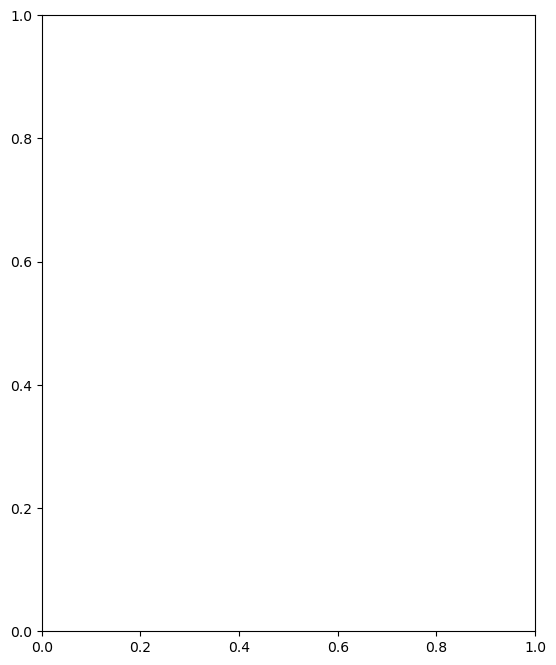

In [90]:
random_image_id = random.randint(0, len(image_dataset-1))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])